# Erosion and dilation implemented in terms of sets

## We will first create the set of all points where the image A is a "1"

In [ ]:
import numpy as np

A = np.zeros([15,17], dtype='int')
A[2:13,3:14] = 1 # creating a simple binary image
#print("image A:\n",A)

A_set = set() # initializing an empty set
H,W = A.shape

for i in range(H):
  for j in range(W):
    if A[i,j] == 1:
      #print("i=%d, j=%d\n" %(i,j))
      #temp_set = set([(i,j)])
      #print(temp_set)
      A_set.add((i,j)) # adding all x,y coordinates of the image to the A_set....notice that I am using the convention that x is the vertical axis (lines) and y is the horizontal axis (columns)

print("A_set\n", A_set)
print("A_set_ordered\n", sorted(A_set))
print("\nImage A\n", A)
print("\n\nSize of A_set =", len(A_set))
print("Number of \"1\"s in image A =", sum(sum(A)))
print("Both sizes above must be obviously equal.")

#drawImagePlt(A)

A_set
 {(7, 3), (6, 9), (11, 11), (7, 12), (12, 12), (3, 7), (2, 5), (8, 5), (5, 8), (10, 8), (6, 7), (5, 5), (11, 5), (10, 7), (7, 6), (6, 10), (12, 6), (4, 10), (2, 6), (5, 11), (4, 5), (10, 13), (9, 3), (7, 5), (12, 11), (3, 12), (8, 12), (2, 11), (9, 9), (6, 13), (7, 8), (12, 8), (3, 11), (8, 9), (4, 12), (2, 12), (9, 4), (10, 3), (11, 10), (12, 13), (3, 6), (8, 6), (10, 9), (9, 7), (6, 4), (5, 4), (11, 4), (10, 4), (6, 11), (12, 7), (11, 9), (4, 11), (3, 5), (2, 7), (9, 13), (8, 3), (5, 10), (4, 6), (10, 10), (5, 7), (11, 3), (7, 4), (12, 4), (8, 13), (4, 8), (2, 8), (9, 8), (5, 13), (7, 11), (12, 9), (3, 10), (8, 10), (4, 13), (2, 13), (9, 11), (12, 3), (11, 13), (3, 9), (2, 3), (8, 7), (9, 6), (6, 5), (5, 3), (11, 7), (10, 5), (6, 8), (11, 8), (7, 13), (3, 4), (2, 4), (9, 12), (8, 4), (5, 9), (4, 7), (10, 11), (6, 6), (5, 6), (10, 6), (7, 7), (12, 5), (4, 9), (3, 3), (2, 9), (5, 12), (4, 4), (10, 12), (6, 3), (7, 10), (12, 10), (3, 13), (8, 11), (2, 10), (9, 10), (6, 12), (11, 1

## Now we will create the set of all points where the kernel is a "1". 

Notice how we are using the coordinate (1,1) of the image as the origin for the kernel. In other words, since the kernel image starts at (0,0), but the kernel itself starts at (1,1) we need to shift the image 1 unit up and left.

This will give us some differences when comparing this to the "ero0" method (because it uses another origin).

The origin of the kernel must be inside the kernel itself, otherwise we would not only erode the original image but also shift it.

We will also create the reflection of B, just to start to get used to it.

In [ ]:
B = np.array([[0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0],
              [0, 1, 1, 1, 0, 0],
              [0, 1, 1, 1, 1, 0],
              [0, 0, 0, 0, 0, 0]])

B_set = set()
B_set_reflected = set()
H,W = B.shape

for i in range(H):
  for j in range(W):
    if B[i,j] == 1:
      #print("i=%d, j=%d\n" %(i,j))
      #temp_set = set([(i,j)])
      #print(temp_set)
      point_i = i-1 # This is pure convetion. We could've used any other point where the kernel is 1. We will actually do that soon.
      point_j = j-1
      B_set.add((point_i,point_j))  #notice that by doing this, we are considering the ORIGIN of the kernel to be (0,0)...therefore, the coordiantes added to the set are going to be relative to that origin
      B_set_reflected.add((-point_i,-point_j))

print("B_set\n", B_set)
print("B_set_ordered\n", sorted(B_set))
print("\nKernel B\n", B)
print("\nB_set_reflected\n", B_set_reflected)
print("\nRemember that sets are UNORDERED, so the order of each (x,y) point in the B_set doesn't correspond in any way with the order of (-x,-y) in B_set_reflected.")

print("\nSize of B_set =", len(B_set))
print("Number of \"1\"s in image B =", sum(sum(B)))
print("Both sizes above must be obviously equal.")

B_set
 {(3, 2), (0, 0), (3, 3), (3, 0), (3, 1), (2, 1), (2, 0), (2, 2), (1, 0), (1, 1)}
B_set_ordered
 [(0, 0), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3)]

Kernel B
 [[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 1 0 0]
 [0 1 1 1 1 0]
 [0 0 0 0 0 0]]

B_set_reflected
 {(0, 0), (-2, 0), (-1, 0), (-3, -3), (-3, -1), (-1, -1), (-2, -2), (-3, -2), (-3, 0), (-2, -1)}

Remember that sets are UNORDERED, so the order of each (x,y) point in the B_set doesn't correspond in any way with the order of (-x,-y) in B_set_reflected.

Size of B_set = 10
Number of "1"s in image B = 10
Both sizes above must be obviously equal.


## Now let's define the erosion.

We will, for each point "z" in image A, translate all B_set by that point "z" and check if B_set is a subset of A_set.

If it is, we will add that point to a new set, and this new set is the eroded image.

This is simply the definition given in "Rafael C. Gonzalez and Richard E. Woods. 2006. Digital Image Processing (3rd Edition). Prentice-Hall, Inc., USA.":
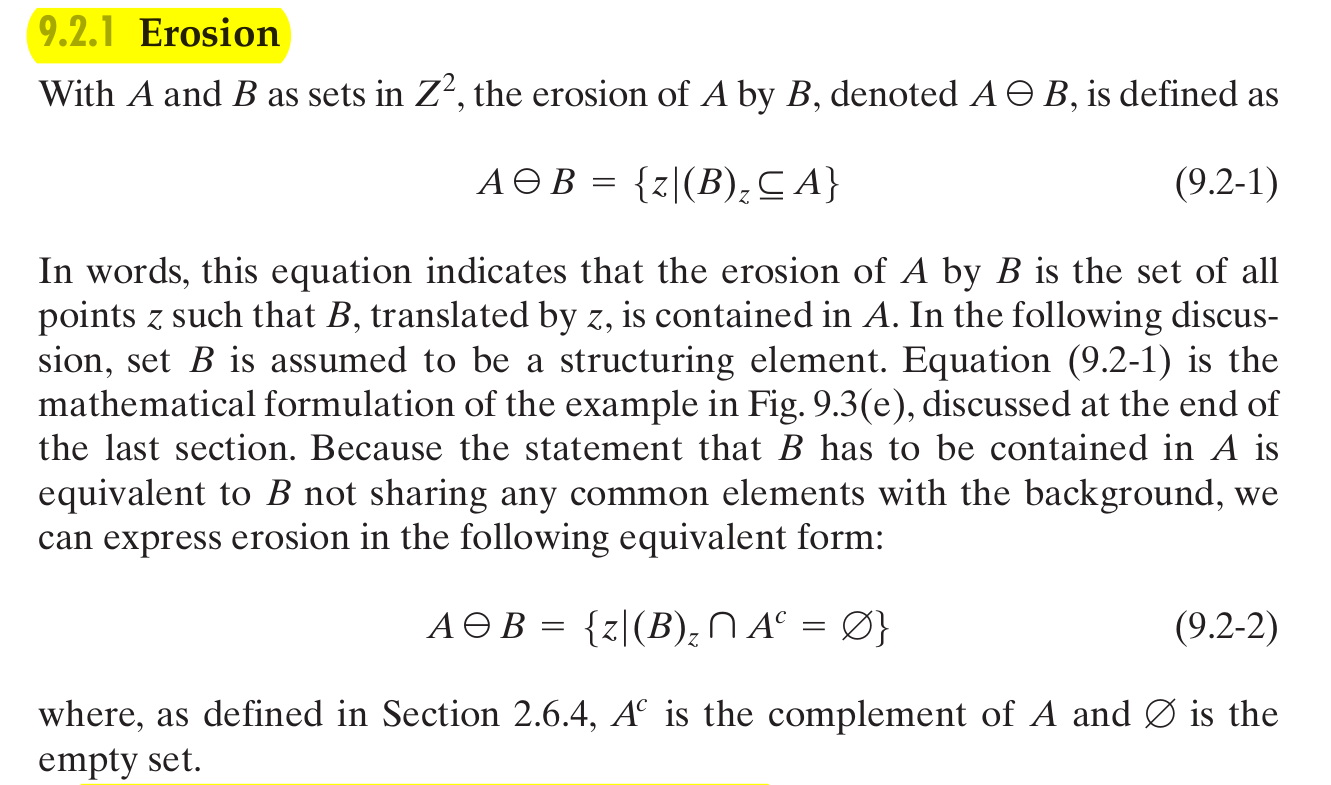

In [ ]:
# In Python, sets may be modified, but the elements contained in the set must be of an immutable type (https://realpython.com/python-sets/),
# so we will need to clear B_set_translated in every iteration.

B_set_translated = set()
eroded_image_set = set()
H_A,W_A = A.shape
H_B,W_B = B.shape

for i in range(H_A): # first we loop through all of image A (height and width)
  for j in range(W_A):

    for k in range(H_B): # then we create a B_set_translated for each point of image A
      for l in range (W_B):
        if B[k,l] == 1:
          point_k = k-1 # This is pure convetion. We could've used any other point where the kernel is 1. We will actually do that soon.
          point_l = l-1
          B_set_translated.add((point_k+i,point_l+j))

    if B_set_translated.issubset(A_set):
      #print("\ni=%d, j=%d" %(i,j))
      #print("\n", B_set_translated)
      eroded_image_set.add((i,j))

    B_set_translated.clear() # clears B_set_translated to create a new one in the next iteration

print("eroded_image_set\n", eroded_image_set)
ordered_eroded_image_set = sorted(eroded_image_set)
print("Ordered eroded_image_set:\n",ordered_eroded_image_set)

eroded_image_set
 {(5, 9), (4, 7), (6, 9), (7, 3), (4, 8), (5, 6), (2, 8), (6, 6), (9, 8), (7, 7), (8, 9), (9, 4), (3, 7), (2, 5), (8, 5), (5, 8), (4, 9), (3, 3), (2, 9), (5, 5), (6, 7), (3, 10), (4, 4), (6, 10), (7, 6), (8, 10), (6, 3), (3, 6), (7, 10), (8, 6), (9, 7), (4, 10), (5, 4), (2, 6), (6, 4), (4, 5), (9, 3), (2, 10), (9, 10), (3, 9), (2, 3), (7, 5), (8, 7), (9, 6), (6, 5), (3, 5), (2, 7), (5, 3), (7, 8), (7, 9), (5, 10), (4, 6), (6, 8), (8, 3), (5, 7), (9, 9), (3, 8), (7, 4), (8, 8), (4, 3), (9, 5), (3, 4), (2, 4), (8, 4)}
Ordered eroded_image_set:
 [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8,

Now we can calculate, for example, the difference of A_set and the eroded_image_set, to check which points were eroded.


In [ ]:
difference = A_set.difference(eroded_image_set)
print("Difference of A and eroded_image_set:\n", difference)
print("Ordered difference:\n", sorted(difference))
print("\nSize of A_set = %d\nSize of eroded_image_set = %d" %(len(A_set), len(eroded_image_set)))
print("\n\nThe size of the difference must be equal to the size of A_set minus the size of eroded_image_set (because the eroded image is within A).\nSize of difference = ", len(difference))

Difference of A and eroded_image_set:
 {(8, 13), (11, 11), (10, 11), (7, 12), (12, 12), (10, 6), (3, 11), (5, 13), (12, 5), (4, 12), (2, 12), (7, 11), (10, 3), (12, 9), (10, 8), (11, 10), (11, 5), (10, 7), (12, 13), (5, 12), (12, 6), (10, 12), (4, 13), (2, 13), (9, 11), (12, 10), (10, 9), (12, 3), (11, 13), (11, 4), (10, 4), (11, 6), (5, 11), (6, 11), (3, 13), (10, 13), (12, 7), (11, 9), (8, 11), (12, 11), (6, 12), (11, 12), (4, 11), (9, 13), (11, 7), (10, 5), (3, 12), (8, 12), (10, 10), (11, 8), (7, 13), (2, 11), (11, 3), (12, 4), (6, 13), (9, 12), (12, 8)}
Ordered difference:
 [(2, 11), (2, 12), (2, 13), (3, 11), (3, 12), (3, 13), (4, 11), (4, 12), (4, 13), (5, 11), (5, 12), (5, 13), (6, 11), (6, 12), (6, 13), (7, 11), (7, 12), (7, 13), (8, 11), (8, 12), (8, 13), (9, 11), (9, 12), (9, 13), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (

Now we will convert eroded_image_set to an image, for better visualization

In [ ]:
max_W = max(max(ordered_eroded_image_set)[0],W_A) # this is just to create an image with the same size of the original image...we will improve this when implementing dilation
max_H = max(max(ordered_eroded_image_set)[1],H_A)

eroded_image = np.zeros([max_H, max_W], dtype='int') # initialize an empty matrix

for i in range(len(ordered_eroded_image_set)):
  h_point = ordered_eroded_image_set[i][0]
  w_point = ordered_eroded_image_set[i][1]
  eroded_image[h_point][w_point] = 1

print("Eroded image:\n", eroded_image)

Eroded image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


And that's it. We just implemented the erosion using set operations. 😀

## Comparing the result with "ero0" method

In [ ]:
def ero0(f,Bc=np.ones((3,3),dtype= 'uint8')):
  H,W = f.shape
  Bh, Bw = Bc.shape
  g = f.copy() # nas listas, as vezes eu uso assim
  
  # para varrer imagem na ordem raster
  for y in range(H): # para cada linha y
    for x in range(W): # para cada coluna x
  
      # para cada vizinho de (x,y)
      for by in range(Bh):
        for bx in range(Bw):
          viz_y = int(y + by - Bh/2 + 0.5) # É PURA CONVENÇÃO
          viz_x = int(x + bx - Bw/2 + 0.5)

          # verificar o domínion da image
          if  Bc[by,bx] and 0 <= viz_y < H and 0 <= viz_x < W:
  
            # para calcular o mínino dos vizinhos
            if g[y,x] > f[viz_y,viz_x]:
              g[y,x] = f[viz_y,viz_x]          
 
  return g

Comparting the result below, using ero0, with the result using set operations, they look different, but that's only because they are considering different origins for the kernel. If you look for the shape itself, it is a rectangle on both cases (of same size).

In [ ]:
resulting_eroded_image = ero0(A,B)
print(resulting_eroded_image)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


##Now let's define the dilation
We will, for each point "z" in image A, translate all B_set_reflected (remember how we defined it in the beginning of this section?) by that point "z" and check if B_set_reflected intersects A.

If it does, we will add that point "z" to a new set, and this new set is the dilated image.

This is simply the definition given in "Rafael C. Gonzalez and Richard E. Woods. 2006. Digital Image Processing (3rd Edition). Prentice-Hall, Inc., USA.":

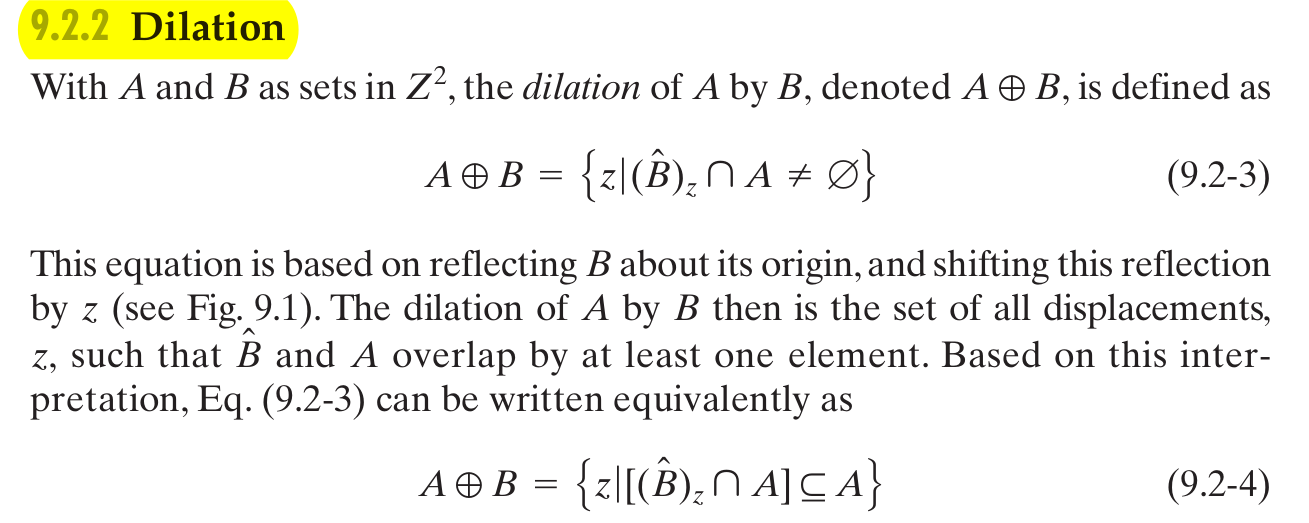

In [ ]:
B_set_reflected_translated = set()
dilated_image_set = set()
H_A,W_A = A.shape
H_B,W_B = B.shape

for i in range(H_A): # first we loop through all of image A (height and width)
  for j in range(W_A):

    for k in range(H_B): # then we create a B_set_reflected_translated for each point of image A
      for l in range (W_B):
        if B[k,l] == 1:
          reflected_point_k = -(k-1)
          reflected_point_l = -(l-1)
          B_set_reflected_translated.add((reflected_point_k+i,reflected_point_l+j))

    #print("B_set_reflected_translated:\n", sorted(B_set_reflected_translated))
    #print("A_set:\n", sorted(A_set))
    intersection = B_set_reflected_translated.intersection(A_set)
    if bool(intersection): # an empty set is falsy in a boolean context (https://realpython.com/python-sets/)
      #print("\ni=%d, j=%d" %(i,j))
      #print("\n", B_set_reflected_translated)
      dilated_image_set.add((i,j))

    B_set_reflected_translated.clear() # clears B_set_translated to create a new one in the next iteration

print("dilated_image_set\n", dilated_image_set)
ordered_dilated_image_set = sorted(dilated_image_set)
print("Ordered dilated_image_set:\n",ordered_dilated_image_set)

dilated_image_set
 {(7, 3), (6, 9), (11, 11), (7, 12), (14, 4), (13, 4), (12, 12), (3, 7), (2, 5), (8, 5), (5, 8), (10, 8), (6, 7), (5, 5), (11, 5), (10, 7), (7, 6), (6, 10), (12, 6), (13, 7), (8, 15), (4, 10), (2, 6), (9, 14), (5, 11), (4, 5), (10, 13), (9, 3), (9, 16), (7, 5), (14, 15), (12, 11), (13, 10), (3, 12), (8, 12), (4, 15), (2, 11), (9, 9), (5, 14), (10, 14), (6, 13), (11, 15), (7, 8), (6, 16), (14, 8), (12, 8), (11, 16), (13, 13), (3, 11), (8, 9), (4, 12), (2, 12), (9, 4), (10, 3), (6, 14), (11, 10), (7, 15), (14, 5), (13, 3), (12, 13), (13, 16), (3, 6), (8, 6), (10, 9), (9, 7), (6, 4), (5, 4), (11, 4), (10, 4), (6, 11), (12, 7), (11, 9), (14, 6), (13, 6), (4, 11), (3, 5), (2, 7), (9, 13), (8, 3), (5, 10), (4, 6), (10, 10), (5, 7), (11, 3), (7, 4), (14, 12), (12, 4), (14, 3), (13, 9), (8, 13), (4, 8), (2, 8), (9, 8), (5, 13), (10, 15), (11, 14), (7, 11), (14, 9), (12, 9), (13, 12), (3, 10), (8, 10), (4, 13), (2, 13), (9, 11), (8, 16), (6, 15), (12, 3), (11, 13), (7, 14), (1

Now we will convert dilated_image_set to an image, for better visualization. But notice the the dilated image is bigger than the original image. So we must be careful when printing it, otherwise we would accidentally crop it.

I will make the following convention:



*   The width output is equal to the width of the image input plus the width of the kernel

*   The height output is equal to the height of the image input plus the height of the kernel


In [ ]:
max_W = W_A + W_B
max_H = H_A + H_B

dilated_image = np.zeros([max_H, max_W], dtype='int') # initialize an empty matrix

for i in range(len(ordered_dilated_image_set)):
  h_point = ordered_dilated_image_set[i][0]
  w_point = ordered_dilated_image_set[i][1]
  dilated_image[h_point][w_point] = 1

print("Original image A:\n", A)
print("\nDilated image:\n", dilated_image)

Original image A:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Dilated image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 

## Comparing the result with "dil0" method:

In [ ]:
def dil0(f,Bc=np.ones((3,3),dtype= 'uint8')):
      """This function will create a dilate of f by Bc
      input:
       - f: input image
       - Bc: structuring element
      output:
       - g: result of filter
      """
      H,W = f.shape
      Bh, Bw = Bc.shape
      Bcy, Bcx = Bh/2, Bw/2
      g = f.copy() # nas listas, as vezes eu uso assim
     
      # para varrer imagem na ordem raster
      for y in range(H): # para a imagem unidimensional, y = 0 sempre (será executado uma única vez)
        for x in range(W): # para cada coluna x
     
          # para cada vizinho de (x,y)
          for by in range(Bh):
            for bx in range(Bw):
              viz_x = int(x + bx - Bcx + 0.5) 
              viz_y = int(y + by - Bcy + 0.5) # para a imagem unidimensional, viz_y = 0 sempre (será executado uma única vez)
     
              # verificar o domínio da imagem
              if Bc[by,bx] and 0 <= viz_x < W and 0 <= viz_y < H: 
     
                # para calcular o máximo dos vizinhos
                if g[y,x] < f[viz_y,viz_x]:
                  g[y,x] = f[viz_y,viz_x]
      return g

In [ ]:
resulting_dilated_image = dil0(A,B)
print(resulting_dilated_image)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0]]


The result with dil0 is actually different. I think it's because the dil0 method doesn't reflect the kernel around its origin. Since almost ALL kernels are symettrical around its origin, it doesnt make a difference. But when using another shape of kernel (I don't even know if it's useful or not) the results are different.

### Printing all the results

In [ ]:
import matplotlib.pylab as plt

def drawImage(f):
  """This function will draw image f
  input:
  - f: input image
  output:
  - string: image drawing
  """
  l,c = f.shape
  if np.min(f)<0:
    digitos = '%' + str(1+len(str(np.max(f)))) + 'd '
  else:
    digitos = '%' + str(len(str(np.max(f)))) + 'd '
  #print('"'+digitos+'"')
  st = ''
  for i in range(l): # para cada linha
    for j in range(c): # para cada coluna
      st += digitos % f[i][j]
    st += '\n'
  return st

def drawImagePlt(f):
  """This function will draw image f
  input:
    - f: input image
  output:
    - string: image drawing
  """
  h,w = f.shape
  m = min(h,w)
  plt.figure(figsize=(m,m))
  plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
  plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
  _=plt.imshow(f,'gray')
  plt.yticks(range(h))
  plt.xticks(range(w))
  plt.ylabel('y')
  plt.xlabel('x')
  [plt.axvline(i+.5, 0, h, color='r') for i in range(w-1)]
  [plt.axhline(j+.5, 0, w, color='r') for j in range(h-1)]
  
def drawImageVizinhos(f,B,x,y):
  """This function will draw image f, considering a kernel
  input:
    - f: input image
    - B: kernel
    - x,y: center pixel of kernel
  output:
    - string: image drawing
  """
  h,w = f.shape
  Bh, Bw = B.shape
  Bcx, Bcy = Bw//2, Bh//2
  m = min(h,w)
  plt.figure(figsize=(m,m))
  plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
  plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
  plt.imshow(f,'gray')
  plt.yticks(range(h))
  plt.xticks(range(w))
  plt.ylabel('y')
  plt.xlabel('x')
  plt.title('Processando pixel (x,y)=(%d,%d)'%(x,y))
  [plt.axvline(i+.5, 0, h, color='r') for i in range(w-1)]
  [plt.axhline(j+.5, 0, w, color='r') for j in range(h-1)]
  [plt.plot([i+x-Bcx-.5,i+x-Bcx-.5], [y-Bcy-.5,Bh+y-Bcy-.5], color='y', linewidth=5) for i in range(Bw+1)]
  [plt.plot([x-Bcx-.5,x-Bcx+Bw-.5], [j+y-Bcy-.5, j+y-Bcy-.5], color='y', linewidth=5) for j in range(Bh+1)]

## Image A

Image A:



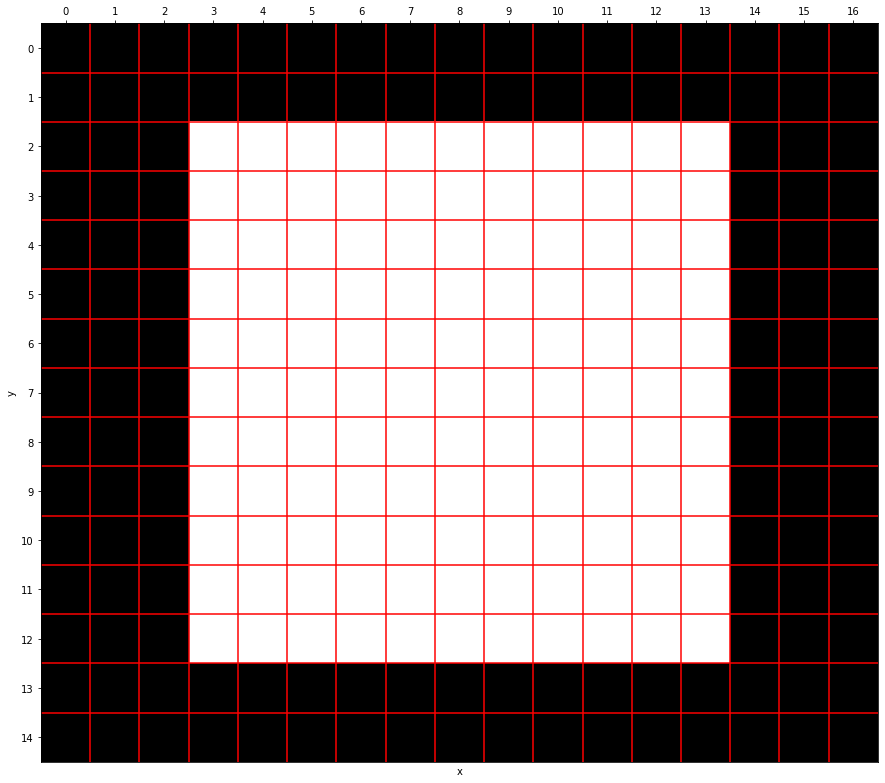

In [ ]:
print("Image A:\n")
drawImagePlt(A)

## Kernel B and Kernel B reflected
Remember that, although the image of Kernel B has origin (0,0) (as we can see below), we need to consider the Kernel itself starting at (1,1) (shift it left and up one unit), otherwise it would shift the output images.

Kernel B:



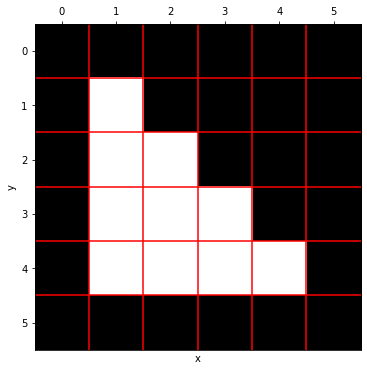

In [ ]:
print("Kernel B:\n")
drawImagePlt(B)

It doesn't make sense to show "B_reflected" as an image because it is defined in negative coordinates, and we don't have "negative pixels". So I will just plot it like a normal scatter plot.

In [ ]:
B_set_reflected_as_a_list = sorted(B_set_reflected) # creates a list of tuples
#B_set_reflected_as_a_list = [list(ele) for ele in B_set_reflected_as_a_list] # converts to list of lists
#drawImagePlt(B_set_reflected_as_a_list)
print("B_set_reflected and ordered:", B_set_reflected_as_a_list)
x_points = [i[1] for i in B_set_reflected_as_a_list]
y_points = [i[0] for i in B_set_reflected_as_a_list]

B_set_reflected and ordered: [(-3, -3), (-3, -2), (-3, -1), (-3, 0), (-2, -2), (-2, -1), (-2, 0), (-1, -1), (-1, 0), (0, 0)]


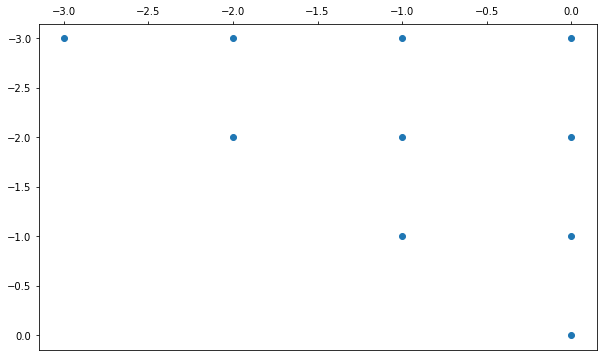

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x_points, y_points)
ax.invert_yaxis()

## Eroded image

Eroded image A:



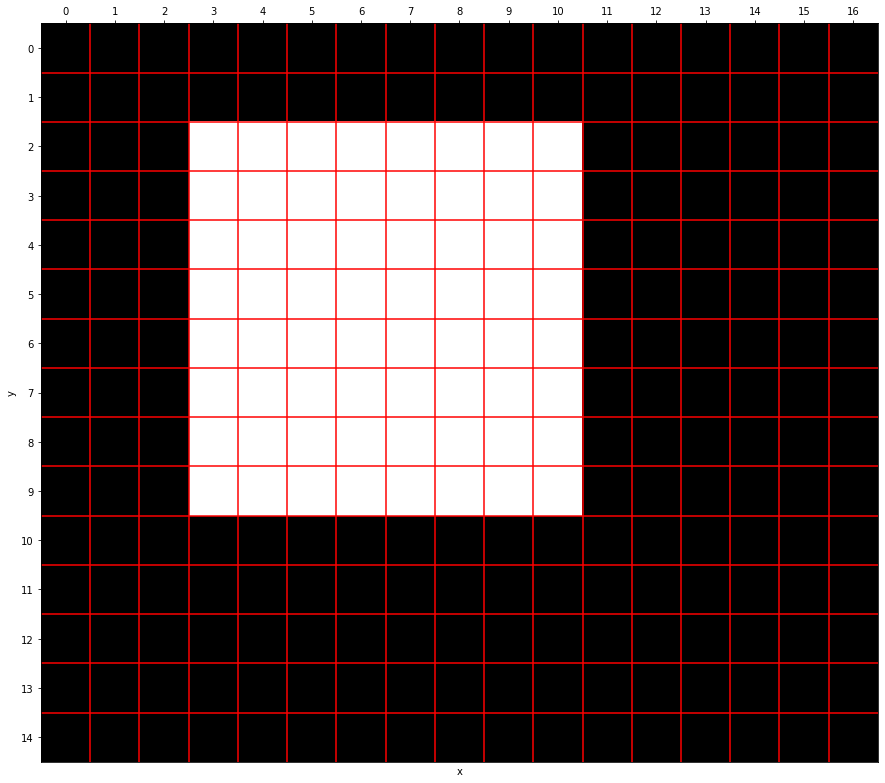

In [ ]:
print("Eroded image A:\n")
drawImagePlt(eroded_image)

## Dilated image

Dilated image A:



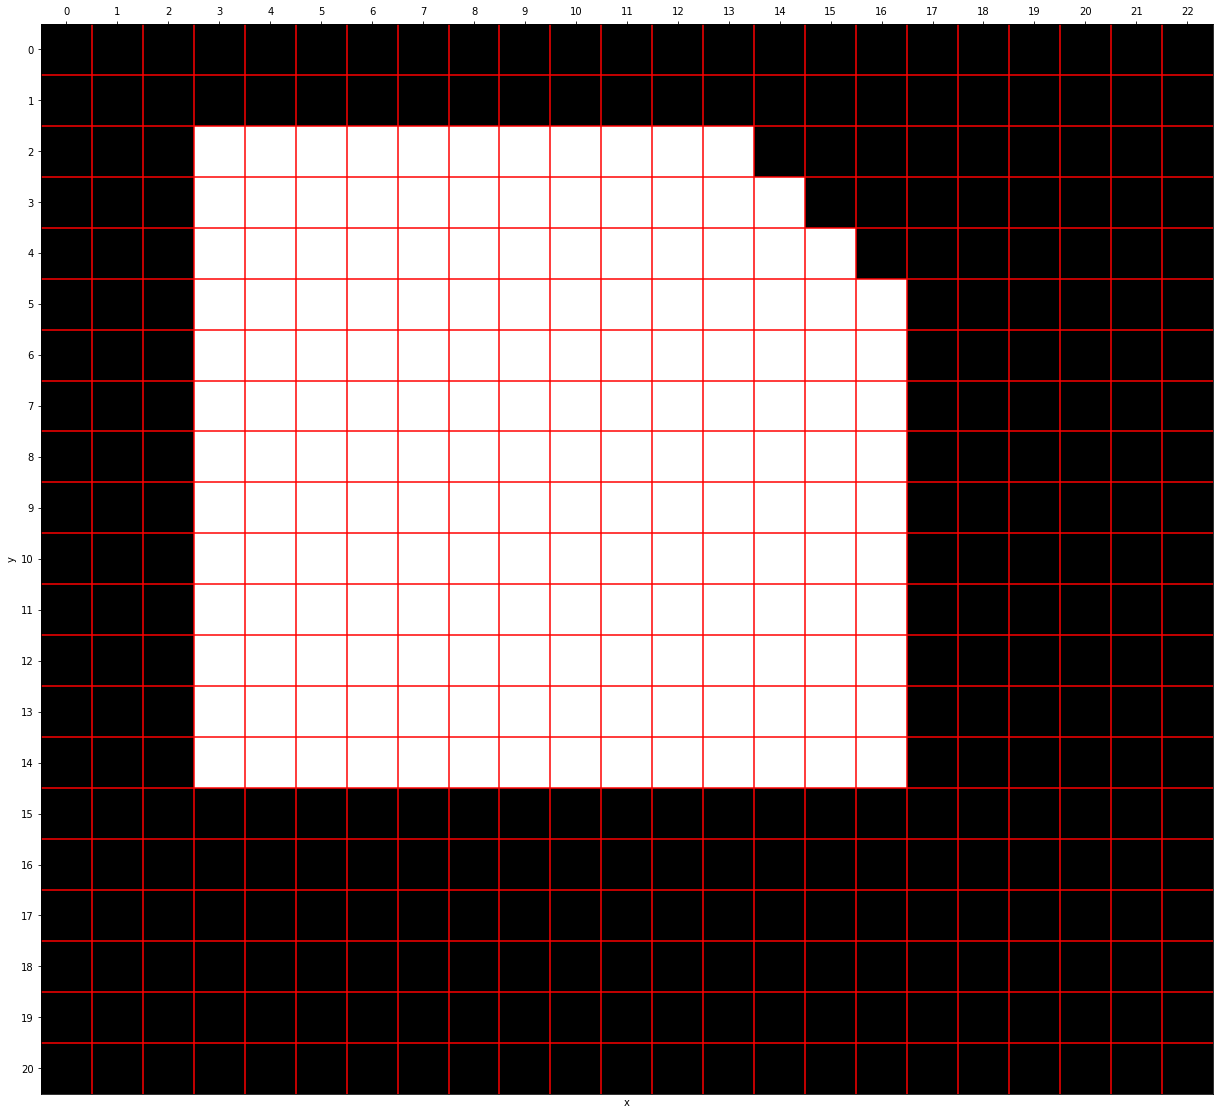

In [ ]:
print("Dilated image A:\n")
drawImagePlt(dilated_image)

## Eroded image on top of original image
In the next part we need to first make sure A is the same shape as dilated_image, otherwise the code won't work. So I will actually make all three images (original, eroded, dilated) the same size as dilated (the biggest one).

In [ ]:
H_dilated, W_dilated = dilated_image.shape
height_dif = H_dilated - H_A
width_dif = W_dilated - W_A
A = np.pad(A, ((0, height_dif), (0, width_dif)), 'constant', constant_values=0)

H_eroded, W_eroded = eroded_image.shape
height_dif = H_dilated - H_eroded
width_dif = W_dilated - W_eroded
eroded_image = np.pad(eroded_image, ((0, height_dif), (0, width_dif)), 'constant', constant_values=0)

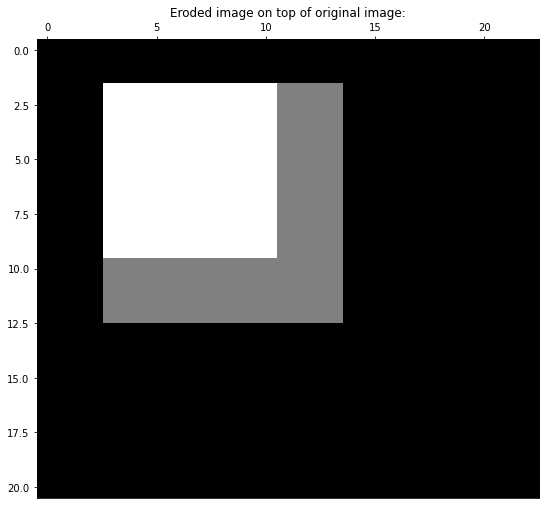

In [ ]:
#print(A+eroded_image)
fig, ax = plt.subplots(figsize=(9, 9))
plt.title("Eroded image on top of original image:")
_=plt.imshow(A+eroded_image,'gray')

## Dilated image on top of original image
We need to first make sure A is the same shape as dilated_image, otherwise the code won't work

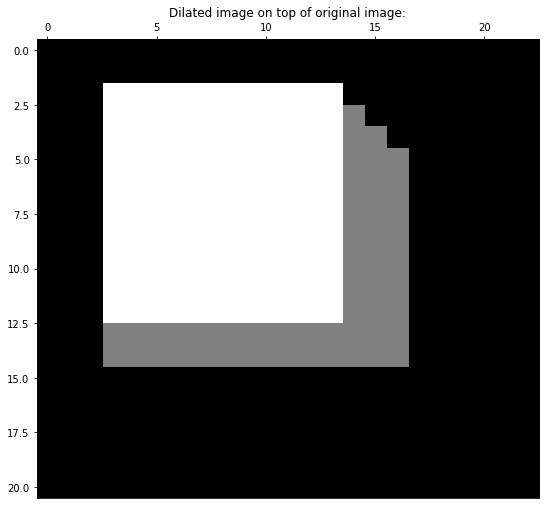

In [ ]:
#print(dilated_image+A)
fig, ax = plt.subplots(figsize=(9, 9))
plt.title("Dilated image on top of original image:")
_=plt.imshow(A+dilated_image,'gray')

## Eroded, dilated and original image on top of each other

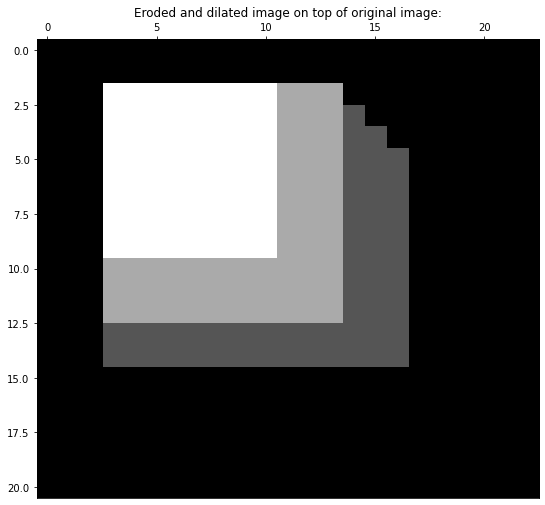

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.title("Eroded and dilated image on top of original image:")
_=plt.imshow(A+dilated_image+eroded_image,'gray')

# Defining methods to apply erosion and dilation using set operations.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
import os
import shutil

# Method to convert set of coordinates to matrix

In [ ]:
def set_to_2Dmatrix(set, h, w):
  # input: A (set), h, w (integers representing the size of the output image)
  # output: an image/matrix
  set_ordered = sorted(set)
  matrix = np.zeros([h, w], dtype='int') # initialize an empty matrix

  for i in range(len(set_ordered)):
    h_point = set_ordered[i][0]
    w_point = set_ordered[i][1]
    if h_point >= 0 and w_point >= 0:
      matrix[h_point][w_point] = 1
  
  return matrix

# Method to record images to be displayed later

In [ ]:
def record_image(A, B, z_point, record_z, index, title, outputImage, path):
  H_A, W_A = A.shape

  # create two figures, side by side, one of the kernel going through A, and another one of just the origin of the kernel
  fig, ax = plt.subplots(1,2, figsize=(18,8))
  fig.suptitle(title)

  A_B = A+B # plot image A and kernel B on top of each other
  if record_z: # if the translation z is added to the output image, treat it speacially
    A_B[z_point[0]][z_point[1]] = 3
    outputImage[z_point[0]][z_point[1]] = 1
  
  # Customize colors of first subplot
  cmap1 = colors.ListedColormap(['black', 'gray', 'white', 'red'])
  bounds=[0,1,2,3,4]
  norm1 = colors.BoundaryNorm(bounds, cmap1.N)
  _=ax[0].imshow(A_B,cmap=cmap1,norm=norm1)

  # Customize colors of first subplot
  cmap2 = colors.ListedColormap(['black', 'red'])
  bounds=[0,1,3]
  norm2 = colors.BoundaryNorm(bounds, cmap2.N) 
  _=ax[1].imshow(outputImage,cmap=cmap2,norm=norm2) # only origin

  plt.setp(ax, yticks=range(H_A), xticks=range(W_A), ylabel='x', xlabel='y')
  [ax[l].xaxis.tick_top() for l in range(2)]
  [ax[l].xaxis.set_label_position('top') for l in range(2)]

  [[ax[k].axvline(i+.5, 0, H_A, color='r') for i in range(W_A-1)] for k in range(2)]
  [[ax[l].axhline(j+.5, 0, W_A, color='r') for j in range(H_A-1)] for l in range(2)]

  path_name = path + str(index) + '.jpg' # saving as jpg because I don't care about quality loss in this application
  plt.savefig(path_name)
  plt.close() # uncomment this line to display the images instead of just saving it

  return outputImage

# Method to pad images

In [ ]:
def images_right_pad(A,B,outputImage, H_max, W_max):
  #print(A)
  H_A, W_A = A.shape
  H_B, W_B = B.shape
  H_outputImage, W_outputImage = outputImage.shape
  
  height_dif = H_max - H_A
  width_dif = W_max - W_A
  A = np.pad(A, ((0, height_dif), (0, width_dif)), 'constant', constant_values=0)
  #print(A)

  #print(B)
  height_dif = H_max - H_B
  width_dif = W_max - W_B
  B = np.pad(B, ((0, height_dif), (0, width_dif)), 'constant', constant_values=0)
  #print(B)

  height_dif = H_max - H_outputImage
  width_dif = W_max - W_outputImage
  outputImage = np.pad(outputImage, ((0, height_dif), (0, width_dif)), 'constant', constant_values=0)

  return A, B, outputImage

# Check output folder

In [ ]:
def clearFolder(path):
  isExist = os.path.exists(path)
  if not isExist:
    os.makedirs(path)
  else:
    shutil.rmtree(path)
    os.makedirs(path)

# EROSION
Slightly different than before. That's because I noticed that we don't need to cycle through the kernel B on every iteration of point z. So we extract the coordinates of B first, and then just translates it by z.

In [ ]:
def ero_set(A, B=np.ones((3,3),dtype= 'uint8'), B_origin = [1,1], record_on = False): # kernel B is, if not provided, a simple 3x3 square, with origin (1,1)
  # input: A, B images
  # output: a set of the coordinates (x,y) of the eroded image

  A_set = set() # initializing an empty set
  
  # converts image A to the set of all coordinates of A where it its value is 1
  H_A, W_A = A.shape
  for i in range(H_A):
    for j in range(W_A):
      if A[i,j] == 1:
        A_set.add((i,j)) 
  
  # converts image B to the set of all coordinates of B where it its value is 1
  H_B, W_B = B.shape
  B_coordinates = list()
  for k in range(H_B):
    for l in range (W_B):
      if B[k,l] == 1:
        point_k = k - B_origin[0] # make the kernel be centralized in its origin
        point_l = l - B_origin[1]
        B_coordinates.append([point_k,point_l])

  B_set_translated = set() # initialize empty set
  eroded_image_set = set()

  H_length = H_A + H_B
  W_length = W_A + W_B

  if record_on == True:
    path = './outputImages/'
    clearFolder(path)
    outputImage = np.zeros([2, 1], dtype='int')
    A, B, outputImage = images_right_pad(A,B,outputImage, H_length, W_length)
                                         
    outputImage = record_image(A, B, [0,0], False, 0, "Original image A and kernel B.", outputImage, path)  
  
  for i in range(H_A): # we loop through all of image A (height and width) points (we call those points "z")
    for j in range(W_A):
      B_coord_x_translated = [item[0]+i for item in B_coordinates] # translates the x coordinates of B by i
      B_coord_y_translated = [item[1]+j for item in B_coordinates] # translates the y coordinates of B by j
      B_coord_translated = list(zip(B_coord_x_translated, B_coord_y_translated))

      B_set_translated =  set(B_coord_translated) # creates the set B translated by z
      
      record_z = B_set_translated.issubset(A_set)
      if record_z:
        eroded_image_set.add((i,j)) # adds the point z = (i,j) to the eroded_image_set

      if record_on == True:
        outputImage = record_image(A, set_to_2Dmatrix(B_set_translated, H_length, W_length), [i,j], record_z, i*W_A + j+1, str("Original image A and kernel B, moved to coordinates x=%d and y=%d." %(i,j)), outputImage, path)

      B_set_translated.clear() # clears B_set_translated to create a new one in the next iteration

  if record_on == True:
        outputImage = record_image(A, set_to_2Dmatrix(eroded_image_set, H_length, W_length), [i,j], False, i*W_A + j+1, "Final eroded image.", outputImage, path)

  return eroded_image_set

# DILATION

In [ ]:
def dil_set(A, B=np.ones((3,3),dtype= 'uint8'), B_origin = [1,1], record_on = False): # kernel B is, if not provided, a simple 3x3 square, with origin (1,1)
  # input: A, B images
  # output: a set of the coordinates (x,y) of the eroded image

  A_set = set() # initializing an empty set
  
  # converts image A to the set of all coordinates of A where it its value is 1
  H_A, W_A = A.shape
  for i in range(H_A):
    for j in range(W_A):
      if A[i,j] == 1:
        A_set.add((i,j)) 
  
  # converts image B to the set of all coordinates of B where it its value is 1
  H_B, W_B = B.shape
  B_reflected_coordinates = list()
  for k in range(H_B):
    for l in range (W_B):
      if B[k,l] == 1:
        point_k = -(k - B_origin[0]) # make the kernel be centralized in its origin
        point_l = -(l - B_origin[1])
        B_reflected_coordinates.append([point_k,point_l])

  B_set_translated = set() # initialize empty set
  dilated_image_set = set()

  H_length = H_A + H_B
  W_length = W_A + W_B

  if record_on == True:
    path = './outputImages/'
    clearFolder(path)
    outputImage = np.zeros([2, 1], dtype='int')
    A, B, outputImage = images_right_pad(A,B,outputImage, H_length, W_length)
                                         
    outputImage = record_image(A, B, [0,0], False, 0, "Original image A and kernel B before reflection.", outputImage, path)      
  
  for i in range(H_A): # we loop through all of image A (height and width) points (we call those points "z")
    for j in range(W_A):
      B_coord_x_translated = [item[0]+i for item in B_reflected_coordinates] # translates the x coordinates of B by i
      B_coord_y_translated = [item[1]+j for item in B_reflected_coordinates] # translates the y coordinates of B by j
      B_coord_reflected_translated = list(zip(B_coord_x_translated, B_coord_y_translated))

      B_set_reflected_translated =  set(B_coord_reflected_translated) # creates the set B translated by z      
      intersection = B_set_reflected_translated.intersection(A_set)

      record_z = bool(intersection)
      if record_z: # an empty set is falsy in a boolean context (https://realpython.com/python-sets/)
        dilated_image_set.add((i,j)) # adds the point z = (i,j) to the dilated_image_set

      if record_on == True:
        outputImage = record_image(A, set_to_2Dmatrix(B_set_reflected_translated, H_length, W_length), [i,j], record_z, i*W_A + j+1, str("Original image A and kernel B reflected, moved to coordinates x=%d and y=%d." %(i,j)), outputImage, path)

      B_set_reflected_translated.clear() # clears B_set_translated to create a new one in the next iteration

  if record_on == True:
        outputImage = record_image(A, set_to_2Dmatrix(dilated_image_set, H_length, W_length), [i,j], False, i*W_A + j+1, "Final dilated image.", outputImage, path)

  return dilated_image_set

# A visual explanation of erosion and dilation (VIDEO):
Now let's create a simple video to show it.

Code adapted from: https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/

In [ ]:
import cv2
import glob

In [ ]:
def record_video(title):
  img_array = []
  first_frame = 0
  last_frame = 0

  fps = 2
  files = sorted(glob.glob('./outputImages/*.jpg'), key=os.path.getmtime)
  for filename in files:
      
      img = cv2.imread(filename)
      height, width, layers = img.shape
      size = (width,height)
      while first_frame <= (fps*3 - 1): # make sure that first frame is displayed for longer (3 seconds)
        img_array.append(img)
        first_frame += 1
      img_array.append(img)
      
  while last_frame <= (fps*3 - 1): # make sure that the last frame is displayed for longer (3 seconds)
        img_array.append(img)
        last_frame += 1
    
  path = './outputVideos/'
  isExist = os.path.exists(path)
  if not isExist:
    os.makedirs(path)

  path_name = path + title + '.mp4'
  
  out = cv2.VideoWriter(path_name,cv2.VideoWriter_fourcc(*'MP4V'), fps, size)
  
  for i in range(len(img_array)):
      out.write(img_array[i])
  out.release()

In [ ]:
A = np.zeros([15,17], dtype='int')
A[2:13,3:14] = 1 # creating a simple binary image

B = np.array([[0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0],
              [0, 1, 1, 1, 0, 0],
              [0, 1, 1, 1, 1, 0],
              [0, 0, 0, 0, 0, 0]])

A_small = np.zeros([6,9], dtype='int')
A_small[2:5,3:7] = 1 # creating a simple binary image
B_small = np.array([[0, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 1, 1, 0],
                    [0, 1, 1, 1]])

B_N8 = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])

B_N4 = np.array([[0, 1, 0],
                 [1, 1, 1],
                 [0, 1, 0]])

B_column = np.array([[1],
                      [1],
                      [1]])

B_line = np.array([[1, 1, 1]])

Testing the erosion:

In [ ]:
eroded_A_set = ero_set(A_small, B_small, [1,1], True)

In [ ]:
record_video('erosion_A_small_B_small')

In [ ]:
eroded_A_set = ero_set(A, B, [1,1], True)

In [ ]:
record_video('erosion_A_B')

In [ ]:
eroded_A_set = ero_set(A_small, B_N8, [1,1], True)

In [ ]:
record_video('erosion_A_small_B_N8')

In [ ]:
eroded_A_set = ero_set(A_small, B_N4, [1,1], True)

In [ ]:
record_video('erosion_A_small_B_N4')

In [ ]:
eroded_A_set = ero_set(A_small, B_column, [1,0], True)

In [ ]:
record_video('erosion_A_small_B_column')

In [ ]:
eroded_A_set = ero_set(A_small, B_line, [0,1], True)

In [ ]:
record_video('erosion_A_small_B_line')

Testing the dilation:

In [ ]:
dilated_A_set = dil_set(A_small, B_small, [1,1], True)

In [ ]:
record_video('dilation_A_small_B_small')

In [ ]:
dilated_A_set = dil_set(A, B, [1,1], True)

In [ ]:
record_video('dilation_A_B')

In [ ]:
dilated_A_set = dil_set(A_small, B_N8, [1,1], True)

In [ ]:
record_video('dilation_A_small_B_N8')

In [ ]:
dilated_A_set = dil_set(A_small, B_N4, [1,1], True)

In [ ]:
record_video('dilation_A_small_B_N4')

In [ ]:
dilated_A_set = dil_set(A_small, B_column, [1,0], True)

In [ ]:
record_video('dilation_A_small_B_column')

In [ ]:
dilated_A_set = dil_set(A_small, B_line, [0,1], True)

In [ ]:
record_video('dilation_A_small_B_line')